#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Andre Nicolai Gutiérrez Bautista A01793606
*   Javier Munoz Barrios A01794423
*   Fernando Ivan Ramos Esparza A01373377
*   Javier de Alba Pérez A01226046


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, learning_curve

from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix


#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como 
se indica en la página de la UCI.  
NOTA: Si lo deseas, puedes traducirlos y ponerlas en español. 

In [2]:
def download_and_unzip(url, extract_to='.'):
    http_response = urlopen(url)
    zipfile = ZipFile(BytesIO(http_response.read()))
    zipfile.extractall(path=extract_to)

zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'
download_and_unzip(zip_url,'/content')

In [3]:
csv_path = '/content/SouthGermanCredit.asc'
data = pd.read_csv(csv_path,sep=' ')
df =  data.copy()
data.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
df.columns

Index(['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit',
       'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred',
       'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit'],
      dtype='object')

In [5]:
df.columns = ['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age', 'other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [6]:
df.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


#**Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de 
15%.

Los modelos se estarán entrenando con el método de validación cruzada, así que no es necesario en este paso generar el conjunto de validación. Define como la variable X a todas las variables de entrada y a la variable Y como la variable de salida. 


In [7]:
from locale import D_FMT

X = df.iloc[:,:-1]  

Y = df.iloc[:,-1] 


In [8]:
Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


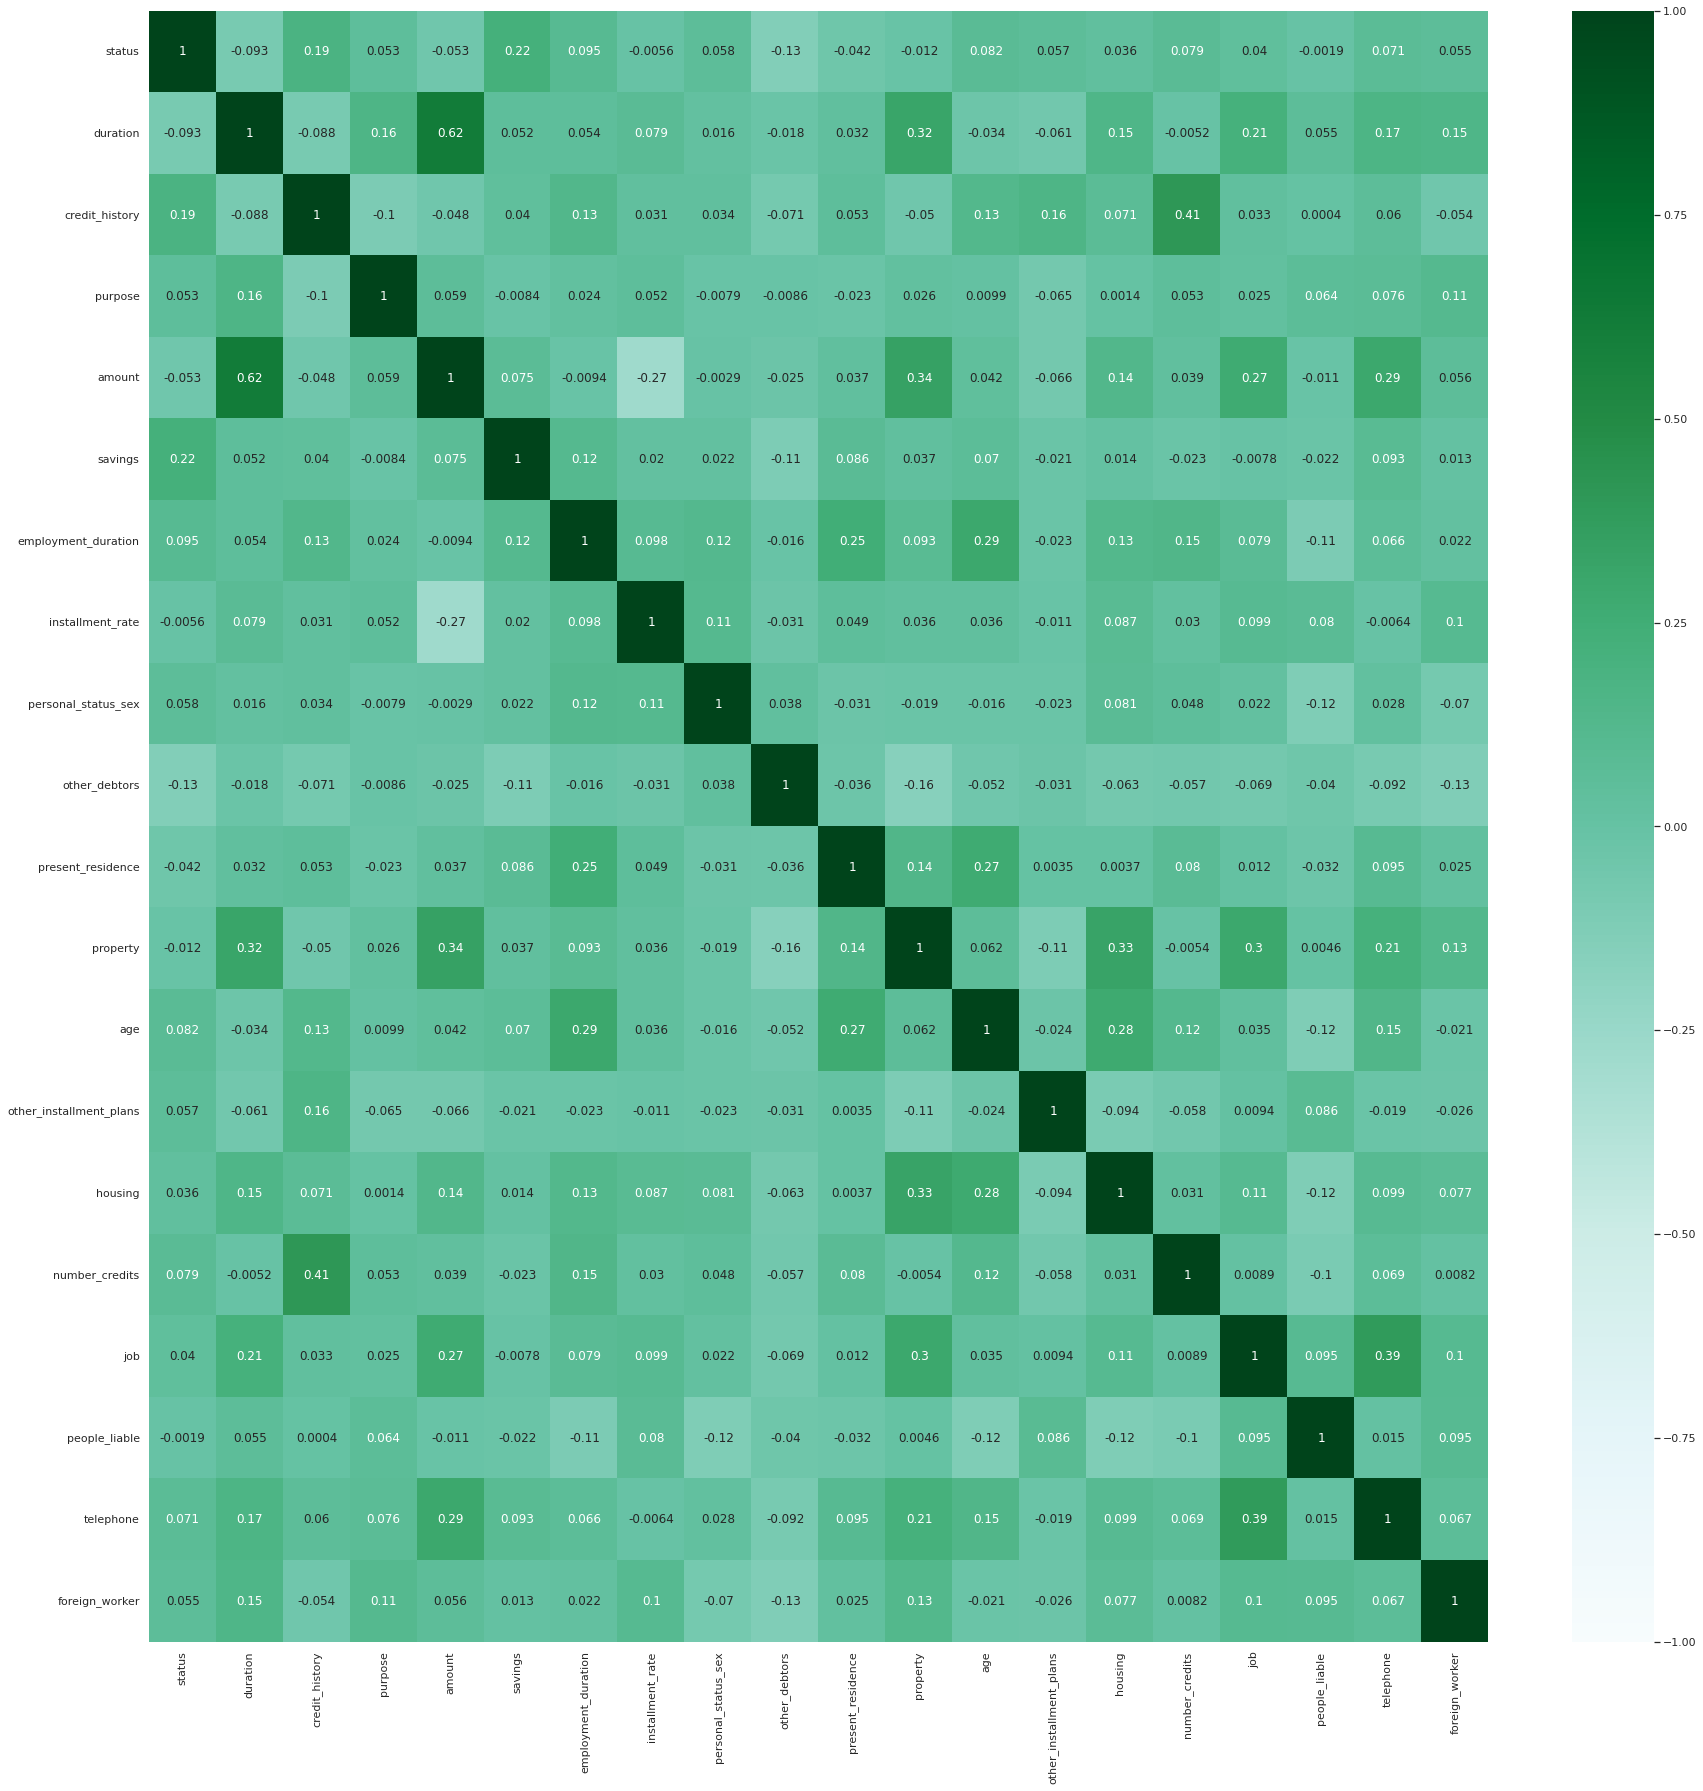

In [9]:
sns.set(rc={'figure.figsize':(30,30)}) 
sns.heatmap(Xtv.corr(method="pearson"), vmin=-1,vmax=1,cmap='BuGn',annot=True)
plt.show()

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas 
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de 
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal 
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha 
información realiza un Pipeline que incluya al menos las siguientes transformaciones: 

* a.  Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable 
(decide y justifica que tipo de imputación realizas en cada caso). 

* b.  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una 
transformación que escale a todas ellas en un rango equiparable. 

* c.  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y 
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la 
transformación one-hot encoding. Por el momento dejar las variables ordinales sin 
transformar. 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numbe

In [11]:
# revisamos si hay valores nulos 
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [12]:
# analisis de variables categoricas
cat_variables = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing']
df[cat_variables]

,status,credit_history,purpose,savings,personal_status_sex,other_debtors,other_installment_plans,housing
0,1,4,2,1,2,1,3,1
1,1,4,0,1,3,1,3,1
2,2,2,9,2,2,1,3,1
3,1,4,0,1,3,1,3,1
4,1,4,0,1,3,1,1,2
...,...,...,...,...,...,...,...,...
995,1,2,3,1,3,1,3,1
996,1,2,0,1,3,2,3,2
997,4,4,0,5,3,1,3,3
998,2,2,3,5,3,1,3,2


In [13]:
num_variables = ['duration','amount','employment_duration','installment_rate','present_residence','age','number_credits','people_liable']
df[num_variables]

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable
0,18,1049,2,4,4,21,1,2
1,9,2799,3,2,2,36,2,1
2,12,841,4,2,4,23,1,2
3,12,2122,3,3,2,39,2,1
4,12,2171,3,4,4,38,2,2
...,...,...,...,...,...,...,...,...
995,24,1987,3,2,4,21,1,1
996,24,2303,5,4,1,45,1,2
997,21,12680,5,4,4,30,1,2
998,12,6468,1,2,1,52,1,2


In [14]:
bin_variables = ['people_liable','telephone','foreign_worker']
df[bin_variables].head()

,people_liable,telephone,foreign_worker
0,2,1,2
1,1,1,2
2,2,1,2
3,1,1,1
4,2,1,1


In [15]:
# num_variables = ['duration','amount','employment_duration','installment_rate','present_residence','age','number_credits','people_liable']
# cat_variables = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing']
# bin_variables = ['people_liable','telephone','foreign_worker']

# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['duration','amount','age']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['status', 'credit_history', 'purpose', 'savings', 'other_debtors', 'other_installment_plans', 'housing'] # aqui hay que modificar las columnas que queremos imputar con moda 


catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = ['people_liable','telephone','foreign_worker']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')



 a)Utilizamos la mediana porque muchas veces los outliers al utilizar el promedio generan mucho ruido. Al utilizar la mediana reducimos el diferencial que se puede generar cuando los outliers están muy separados de el conjunto general de los datos, creemos que al usar el valor de en medio podemos balancear de mejor manera nuestra df.
 
 c)Es necesario convertir las variables binarias y categóricas a one-hot encoding para poder transformarlas en datos numéricos que se puedan procesar en un modelo ya sea de regresión o de algún otro tipo.

#**Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de 
aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás 
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda 
aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las 
siguientes características: 

*  a.  Usa los parámetros predeterminados de cada modelo.  

* b.  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, 
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes 
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. 
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() 
de scikit-learn para definir las métricas). 

* c.  Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones. 

* d.  Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como 
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la 
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu 
respuesta. 

- e.  En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de 
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 
-- i.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión Logística con su 
hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de 
los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”.  
-- ii.  Obtener las curvas de validación (validation_curve) en la cual se va incrementando 
la complejidad del hiperparámetro “max_depth” para el modelo de árbol de 
decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima 
profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del 
desempeño del modelo.  
-- iii.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando 
el tamaño de la muestra para el modelo de regresión bosque aleatorio (random 
forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en 
la partición de los conjuntos de entrenamiento y la métrica “recall”, como 
evaluación del desempeño del modelo.  

In [16]:
# Función para obtener los modelos

def get_models():
  modelos, nombres = list(), list()

  # técnica y nombre: LogisticReg
  modelos.append(LogisticRegression(max_iter=10000))
  nombres.append("LogisticReg")

  # técnica y nombre: DecTree
  modelos.append(DecisionTreeClassifier())
  nombres.append("DecTree")

  # técnica y nombre: RandForest
  modelos.append(RandomForestClassifier())
  nombres.append("RandForest")


  return modelos, nombres

In [17]:
# Funciones para calcular métricas

def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  acc = (cm[1][1] + cm[0][0]) / np.sum(cm)
  return acc

def mi_precision(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  precision = cm[1][1] / (cm[1][1]+cm[0][1])
  return precision

def mi_recall(yreal, ypred):
  vn, fp, fn, vp = confusion_matrix(yreal, ypred).ravel()
  return vp /(vp + fn) # exhaustividad VP / (VP + FN )
  # cm = confusion_matrix(yreal, ypred)
  # recall = cm[1][1] / (cm[1][1]+cm[1][0])
  # return recall

def mi_f1_score(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  f1 = 2*cm[1][1] / (2*cm[1][1]+cm[0][1]+cm[1][0])
  return f1

def mi_g_mean(yreal, ypred):
  cm = confusion_matrix(yreal,ypred)
  recall = mi_recall(yreal, ypred)
  especificidad = cm[0][0] / (cm[0][0] + cm[0][1])
  gmean = np.sqrt(recall * especificidad)

  return gmean

In [18]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

Prueba
LogisticReg:
mean Accuracy: 0.895 (0.0231)
mean Precision: 0.800 (0.0181)
mean Recall: 0.895 (0.0231)
mean F1 Score: 0.844 (0.0171)
Gmean: 0.651 (0.0402)

Validación
LogisticReg:
mean Accuracy: 0.816 (0.0918)
mean Precision: 0.774 (0.0609)
mean Recall: 0.816 (0.0918)
mean F1 Score: 0.791 (0.0553)
Gmean: 0.557 (0.1849)



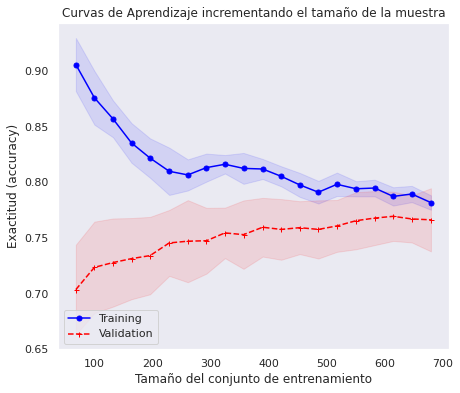

Prueba
DecTree:
mean Accuracy: 0.776 (0.0389)
mean Precision: 0.781 (0.0193)
mean Recall: 0.776 (0.0389)
mean F1 Score: 0.778 (0.0231)
Gmean: 0.615 (0.0379)

Validación
DecTree:
mean Accuracy: 0.762 (0.0550)
mean Precision: 0.765 (0.0533)
mean Recall: 0.762 (0.0550)
mean F1 Score: 0.762 (0.0387)
Gmean: 0.572 (0.0996)



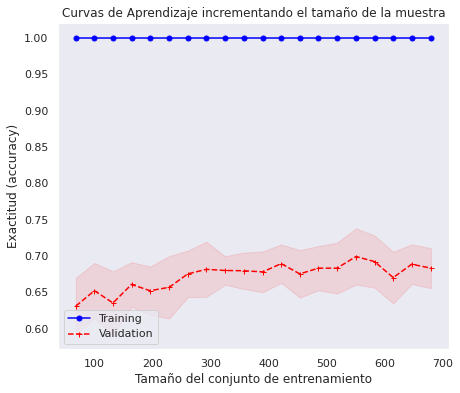

Prueba
RandForest:
mean Accuracy: 0.913 (0.0276)
mean Precision: 0.793 (0.0116)
mean Recall: 0.913 (0.0276)
mean F1 Score: 0.848 (0.0129)
Gmean: 0.634 (0.0282)

Validación
RandForest:
mean Accuracy: 0.873 (0.0643)
mean Precision: 0.730 (0.0333)
mean Recall: 0.873 (0.0643)
mean F1 Score: 0.794 (0.0391)
Gmean: 0.448 (0.1087)



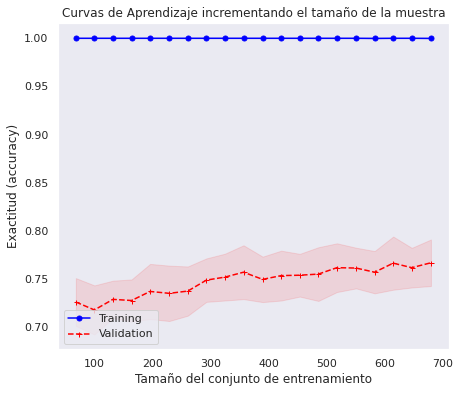

In [19]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list()   

for i in range(len(modelos)):
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  mismetricas = {'accuracy':make_scorer(mi_recall), 
                 'precision':make_scorer(mi_precision), 
                 'recall':make_scorer(mi_recall), 
                 'f1score':make_scorer(mi_f1_score),
                 'gmean':make_scorer(mi_g_mean) }

  resultados_modelo_train = cross_validate(pipeline,Xtv, ytv,scoring=mismetricas,cv=kfold)
  resultados_modelo_test = cross_validate(pipeline,Xtest, ytest,scoring=mismetricas,cv=kfold)
  delta_train_sz = np.linspace(0.1, 1.0, 20)
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelos[i] ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11)
  resultados.append(resultados_modelo_train) 
  
  

  print('Prueba\n%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1 Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_modelo_train['test_accuracy']),
                                                                          np.std(resultados_modelo_train['test_accuracy']), 
                                                                          np.mean(resultados_modelo_train['test_precision']),
                                                                          np.std(resultados_modelo_train['test_precision']), 
                                                                          np.mean(resultados_modelo_train['test_recall']),
                                                                          np.std(resultados_modelo_train['test_recall']),
                                                                          np.mean(resultados_modelo_train['test_f1score']),
                                                                          np.std(resultados_modelo_train['test_f1score']), 
                                                                          np.mean(resultados_modelo_train['test_gmean']),
                                                                          np.std(resultados_modelo_train['test_gmean']),  
                                                                          ))
  
  print('Validación\n%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1 Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_modelo_test['test_accuracy']),
                                                                          np.std(resultados_modelo_test['test_accuracy']), 
                                                                          np.mean(resultados_modelo_test['test_precision']),
                                                                          np.std(resultados_modelo_test['test_precision']), 
                                                                          np.mean(resultados_modelo_test['test_recall']),
                                                                          np.std(resultados_modelo_test['test_recall']),
                                                                          np.mean(resultados_modelo_test['test_f1score']),
                                                                          np.std(resultados_modelo_test['test_f1score']), 
                                                                          np.mean(resultados_modelo_test['test_gmean']),
                                                                          np.std(resultados_modelo_test['test_gmean']),  
                                                                          ))
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

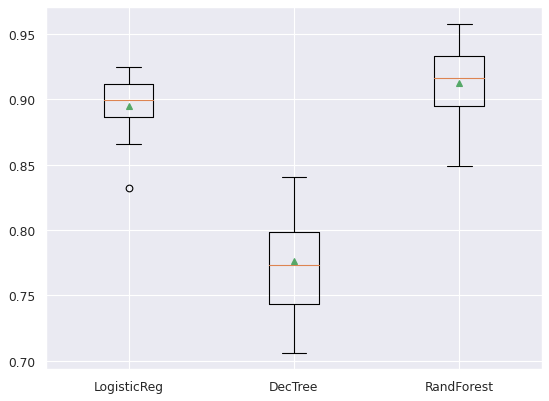

In [20]:
bpGmean = list()
plt.figure(figsize=(8, 6), dpi=80)
for i in range(len(resultados)):
  bpGmean.append(resultados[i]['test_recall'])
plt.boxplot(bpGmean, labels=nombres, showmeans=True)
plt.show()

d) A nuestro parecer el modelo de regresión logística es un buen modelo el cual no está ni sobreentrendo ni subentrenado, ya que al aumento de datos de entrada las gráficas comienzan a converger y se va mejorando el desempeño del modelo, al ser la exactitud inversamente proporcional al error, es lógico este tipo de comportamiento en la gráfica. Por otra parte los modelos de árbol de decisión y bosque aleatorio están sobreentrenados y lo que debemos hacer es podar la cantidad de hojas.

#**Ejercicio-5.**
5. Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así
como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método
GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores
hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación
cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también
aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha
seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas.
Puedes consultar su documentación de GridSearchCV en la siguiente liga:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

      a. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores
hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su
búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso
deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de
parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la
métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la
documentación.

      b. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score”
para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento.

      c. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth,
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring)
“precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor
del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de
la métrica “precision”? Incluye tus conclusiones.

      d. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision”
para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento.

      e. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth,
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”.
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor
desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica
“recall”? Incluye tus conclusiones.
NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en
llevar a cabo

    f. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para
el modelo de bosque aleatorio, obtener las curvas de validación (validation curve),
incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con
al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres
adecuados para mejorar el resultado y evitar el sobreentrenamiento o el
subentrenamiento.

In [23]:
from sklearn.model_selection import GridSearchCV

def mi_searchCV(modelo, dicc_gridm, s):
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  # pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelo)])
  grid = GridSearchCV(
        n_jobs=-1,
        estimator= modelo, cv=kfold, 
        param_grid=dicc_gridm, scoring=s)
  Xx = columnasTransformer.fit_transform(Xtv)
  grid.fit(Xx, np.ravel(ytv))
  print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
  print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
  print('Métrica utilizada:', grid.scoring)
  return grid


a) Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.

In [27]:
# Regresion Logistica
'''
Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 
Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty.
En este caso deberás usar la métrica (scoring) “f1-score”. 
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. 
¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. 
Revisa la documentación.
'''
# dicc_grid1 =  [
    # {'C':[0.0001,0.01,0.1,1.0,10.,100.],'penalty': ['l2'], 'solver': [ 'newton-cg']},
    #            {'C':[0.0001,0.01,0.1,1.0,10.,100.],'penalty': ['l2'], 'solver': [ 'lbfgs']},
    #            {'C':[0.0001,0.01,0.1,1.0,10.,100.],'penalty': ['l1','l2'], 'solver': ['liblinear']},
              #  {'C':[0.0001,0.01,0.1,1.0,10.,100.],'penalty': ['l2'], 'solver': ['sag']},
              #  {'C':[0.0001,0.01,0.1,1.0,10.,100.],'penalty': ['l1','l2','elasticnet'], 'solver': ['saga']}]
#'class_weight':[{0: w} for w in [1, 2, 4, 6, 10]]
dicc_grid1 = [{'C':[0.0001,0.01,0.1,1.0,10.,100.],
              'solver':['liblinear','saga'],
              'class_weight':[None,'balanced'],#[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 2}, {0: 1, 1: 3}], #automatizar con un map
              'penalty':['l1']
              }]

grid_LR = mi_searchCV(modelos[0], dicc_grid1,'f1')
modelos[0]

Mejor valor de exactitud obtenido con la mejor combinación: 0.8456304280184758
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Métrica utilizada: f1


LogisticRegression(max_iter=10000)

b) Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

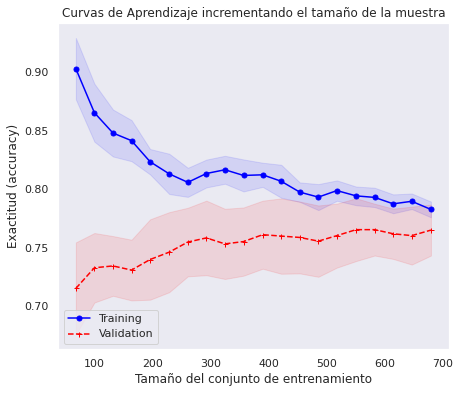

In [28]:
# Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” 
# para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve),
# incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado,
# puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
delta_train_sz = np.linspace(0.1, 1.0, 20)
tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelos[0] ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

c) Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.

In [48]:
# Arbol de desición 
dicc_grid2 = {
              'ccp_alpha':np.linspace(0.0,1.0,10),
              'criterion':['gini','entropy'],
              'max_depth': range(1,20),
              'min_samples_split': range(2,4),# usualmente 2 
              'class_weight':[None,'balanced'], #automatizar con un map
              }
mi_searchCV(modelos[1],dicc_grid2,'f1')

Mejor valor de exactitud obtenido con la mejor combinación: 0.8294325197537401
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Métrica utilizada: f1


d) Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

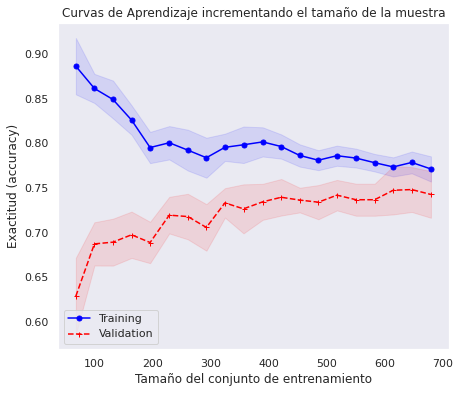

In [69]:
# {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
model_tree = DecisionTreeClassifier(max_depth=3,min_samples_split=2) #modelos[1]
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
delta_train_sz = np.linspace(0.1, 1.0, 20)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = model_tree ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)


e) Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones. NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo

In [71]:
# Bosque aleatorio 
# dicc_grid3 = {
#               'ccp_alpha':np.linspace(0.0, 2.0, 5),
#               'criterion':['gini','entropy'],
#               'max_depth': np.linspace(1, 30, 10, dtype="int"),
#               'min_samples_split': np.linspace(1, 30, 10, dtype="int"),
#               'class_weight':[{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 2}, {0: 1, 1: 3}], #automatizar con un map
#               }
dicc_grid3 = {
              'ccp_alpha':np.linspace(0.0,1.0,10),
              'criterion':['gini','entropy'],
              'max_depth': range(1,20),
              'min_samples_split': range(2,4),# usualmente 2 
              'class_weight':[None,'balanced'], #automatizar con un map
              }
mi_searchCV(modelos[2],dicc_grid3,'recall')

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Métrica utilizada: recall


f) Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

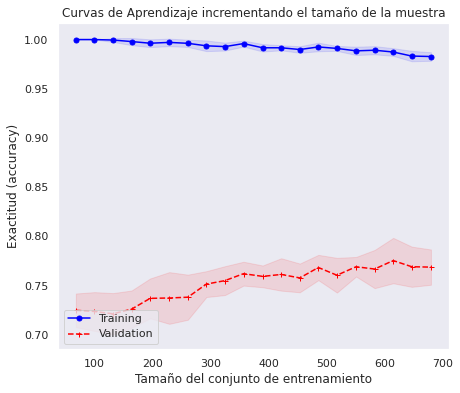

In [73]:
# {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
model_randomf = RandomForestClassifier(max_depth=10,min_samples_split=2) #modelos[1]
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
delta_train_sz = np.linspace(0.1, 1.0, 20)

tr_sizes, tr_scores, val_scores = learning_curve(estimator = model_randomf ,    
                                                        X = Xtv,
                                                        y = ytv,
                                                        cv = kfold ,
                                                        train_sizes = delta_train_sz,
                                                        random_state=11)
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

#**Ejercicio-6.**

6. Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando
el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para
entrenamiento y validación:

    a. Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final
obtenido.

    b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e
incluye tus conclusiones finales para este caso.

    c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso.

In [ ]:
None

a) Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.

b) Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.



c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

###**Fin de la Actividad de la semana 6.**